In [1]:
#Library for environments
import gym
from gym.envs.registration import register
from gym.envs.toy_text.frozen_lake import generate_random_map

#Librairies to represent the output
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt

#Essential libraries for computation
import numpy as np
import random
from collections import deque
import tqdm
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

C:\Users\habib\anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [2]:
print('gym:', gym.__version__)

gym: 0.23.1


In [20]:
random_map = generate_random_map(size=8, p=0.3)
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset()

0

In [3]:
# print observation space
print(env.observation_space.n)

# print action space
print(env.action_space.n)


64
4


In [4]:
env.reset()
env.render()

### 1.2) Implement an agent based on a neural network, using a parameter 𝜀𝜀, for making randommoves, that decreases from 1 to 0.1. Describe how you deployed your agent, the motivation behind the design choices, and how you adjusted its parameters, going into detail on whateach parameter does as well. You may use open-source code and libraries if youacknowledge them

### Q-learning agent that uses a neural network

In [5]:
def display_reward_episode_plot(reward_values):
    """
    Display a plot of reward values over episodes.

    Parameters:
    - reward_values (list): List of reward values corresponding to each episode.
    """
    plt.plot(reward_values)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()
    
def display_epsilon_episode_plot(epsilon_values):
    """
    Display a plot of epsilon values over episodes.

    Parameters:
    - epsilon_values (list): List of epsilon values corresponding to each episode.
    """
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.show()


def display_reward_epsilon_plot(reward_values, epsilon_values):
    """
    Display a plot of reward values against epsilon values.

    Parameters:
    - reward_values (list): List of reward values corresponding to each episode.
    - epsilon_values (list): List of epsilon values corresponding to each episode.
    """
    plt.plot(epsilon_values, reward_values)
    plt.xlabel('Epsilon')
    plt.ylabel('Reward')
    plt.show()


In [6]:
# the values chosen for hyperparameters 
discount_factor = 0.9  # Gamma - Discount factor for future rewards
total_episodes = 1000  # Total number of episodes in the training process
max_steps_per_episode = 200  # Maximum number of steps per episode
training_episodes = 100  # Number of initial episodes dedicated to exploration
epsilon = 1.0  # Initial exploration rate
minimum_epsilon = 0.1  # Minimum exploration rate
epsilon_decay_rate = 0.999  # Decay rate for exploration rate

In [7]:
#neural network model
neural_model = tf.keras.Sequential()
neural_model.add(layers.InputLayer(input_shape=1))
# Hidden layers with 24 units and ReLU activation
neural_model.add(layers.Dense(24, activation='relu'))
neural_model.add(layers.Dense(24, activation='relu'))
# Output layer with 1 unit and Sigmoid activation for binary classification
neural_model.add(layers.Dense(1, activation='sigmoid'))
neural_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


### 1.3) Train the agent created in 1.2 on the game. Please note that a high number of episodes maybe required for the agent to reach the goal depending on your implementation. Present thetraining process, the experiments (including the experimental setting), and discuss yourresults. You should make use of figures, including a line plot that shows how the averageamount of rewards over episodes evolves over time

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 1/1000 [00:02<45:51,  2.75s/it]

1/1 [==============================] - 0s 32ms/step


  0%|          | 2/1000 [00:02<20:47,  1.25s/it]

1/1 [==============================] - 0s 30ms/step


  0%|          | 3/1000 [00:03<12:49,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 4/1000 [00:05<20:26,  1.23s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 5/1000 [00:05<17:35,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 6/1000 [00:06<18:00,  1.09s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 7/1000 [00:08<21:04,  1.27s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 8/1000 [00:09<19:15,  1.16s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 9/1000 [00:09<14:47,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 10/1000 [00:11<16:18,  1.01it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 11/1000 [00:12<16:37,  1.01s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 12/1000 [00:12<12:20,  1.33it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 13/1000 [00:14<17:40,  1.07s/it]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 14/1000 [00:14<13:03,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 15/1000 [00:14<11:23,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 16/1000 [00:14<09:16,  1.77it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 17/1000 [00:15<09:14,  1.77it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 18/1000 [00:15<07:09,  2.29it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 19/1000 [00:16<10:34,  1.55it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 20/1000 [00:17<13:07,  1.25it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 21/1000 [00:18<12:58,  1.26it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 22/1000 [00:19<12:48,  1.27it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 23/1000 [00:20<12:51,  1.27it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 24/1000 [00:20<09:55,  1.64it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▎         | 25/1000 [00:20<07:43,  2.10it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 26/1000 [00:21<07:44,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 27/1000 [00:21<09:04,  1.79it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 28/1000 [00:22<08:34,  1.89it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 29/1000 [00:22<06:47,  2.39it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 30/1000 [00:23<09:39,  1.68it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 31/1000 [00:23<07:29,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 32/1000 [00:25<11:37,  1.39it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 33/1000 [00:25<12:00,  1.34it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 34/1000 [00:26<09:52,  1.63it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 35/1000 [00:27<12:01,  1.34it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 36/1000 [00:27<12:18,  1.31it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 37/1000 [00:29<17:28,  1.09s/it]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 38/1000 [00:30<15:09,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 39/1000 [00:31<16:13,  1.01s/it]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 40/1000 [00:31<13:01,  1.23it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 41/1000 [00:32<12:21,  1.29it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 42/1000 [00:33<12:40,  1.26it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 43/1000 [00:34<12:40,  1.26it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 44/1000 [00:34<10:37,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 45/1000 [00:35<12:46,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 46/1000 [00:35<09:43,  1.64it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 47/1000 [00:36<07:47,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 48/1000 [00:39<19:22,  1.22s/it]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 49/1000 [00:39<17:08,  1.08s/it]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 50/1000 [00:40<14:41,  1.08it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 51/1000 [00:41<15:47,  1.00it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 52/1000 [00:42<14:29,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 53/1000 [00:42<12:25,  1.27it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 54/1000 [00:43<11:05,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 55/1000 [00:45<19:48,  1.26s/it]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 56/1000 [00:46<15:10,  1.04it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 57/1000 [00:50<29:07,  1.85s/it]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 58/1000 [00:51<29:30,  1.88s/it]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 59/1000 [00:52<24:39,  1.57s/it]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 60/1000 [00:53<19:47,  1.26s/it]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 61/1000 [00:53<15:27,  1.01it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 62/1000 [00:53<11:32,  1.35it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▋         | 63/1000 [00:54<08:47,  1.78it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 64/1000 [00:54<10:10,  1.53it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 65/1000 [00:55<08:35,  1.81it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 66/1000 [00:56<11:08,  1.40it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 67/1000 [00:56<08:36,  1.81it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 68/1000 [00:56<07:25,  2.09it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 69/1000 [00:59<15:58,  1.03s/it]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 70/1000 [00:59<11:53,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 71/1000 [00:59<11:14,  1.38it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 72/1000 [01:02<17:51,  1.15s/it]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 73/1000 [01:02<13:13,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 74/1000 [01:02<10:42,  1.44it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 75/1000 [01:03<11:00,  1.40it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 76/1000 [01:04<11:23,  1.35it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 77/1000 [01:06<20:58,  1.36s/it]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 78/1000 [01:07<18:39,  1.21s/it]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 79/1000 [01:08<15:52,  1.03s/it]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 80/1000 [01:10<20:03,  1.31s/it]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 81/1000 [01:10<14:44,  1.04it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 82/1000 [01:10<11:36,  1.32it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 83/1000 [01:10<08:46,  1.74it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 84/1000 [01:11<08:07,  1.88it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 85/1000 [01:13<13:42,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▊         | 86/1000 [01:13<11:00,  1.38it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 87/1000 [01:15<17:20,  1.14s/it]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 88/1000 [01:15<12:44,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 89/1000 [01:15<10:06,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 90/1000 [01:17<14:21,  1.06it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 91/1000 [01:19<20:43,  1.37s/it]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 92/1000 [01:20<16:39,  1.10s/it]

1/1 [==============================] - 0s 32ms/step


  9%|▉         | 93/1000 [01:20<12:26,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 94/1000 [01:21<10:56,  1.38it/s]

1/1 [==============================] - 0s 34ms/step


 10%|▉         | 95/1000 [01:21<11:17,  1.34it/s]

1/1 [==============================] - 0s 31ms/step


 10%|▉         | 96/1000 [01:24<20:59,  1.39s/it]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 97/1000 [01:25<16:52,  1.12s/it]

1/1 [==============================] - 0s 30ms/step


 10%|▉         | 98/1000 [01:25<13:17,  1.13it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 99/1000 [01:25<10:38,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 100/1000 [01:26<10:35,  1.42it/s]

1/1 [==============================] - 0s 32ms/step


 10%|█         | 101/1000 [01:26<08:09,  1.84it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 102/1000 [01:26<06:24,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 103/1000 [01:29<15:47,  1.06s/it]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 104/1000 [01:29<12:29,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 105/1000 [01:30<12:21,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 106/1000 [01:30<09:57,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 107/1000 [01:32<12:36,  1.18it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 108/1000 [01:33<16:23,  1.10s/it]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 109/1000 [01:34<15:38,  1.05s/it]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 110/1000 [01:35<12:37,  1.17it/s]

1/1 [==============================] - 0s 34ms/step


 11%|█         | 111/1000 [01:36<13:18,  1.11it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 112/1000 [01:36<10:20,  1.43it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█▏        | 113/1000 [01:36<08:23,  1.76it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 114/1000 [01:36<06:59,  2.11it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 115/1000 [01:37<09:58,  1.48it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 116/1000 [01:38<07:46,  1.90it/s]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 117/1000 [01:38<07:07,  2.07it/s]

1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 118/1000 [01:40<13:54,  1.06it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 119/1000 [01:41<13:34,  1.08it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 120/1000 [01:42<12:00,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 121/1000 [01:42<10:19,  1.42it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 122/1000 [01:43<10:17,  1.42it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 123/1000 [01:44<11:43,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 124/1000 [01:44<10:19,  1.41it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▎        | 125/1000 [01:44<08:03,  1.81it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 126/1000 [01:46<11:25,  1.27it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 127/1000 [01:47<14:07,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 128/1000 [01:47<10:32,  1.38it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 129/1000 [01:48<09:58,  1.46it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 130/1000 [01:50<15:57,  1.10s/it]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 131/1000 [01:51<14:52,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 132/1000 [01:51<12:35,  1.15it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 133/1000 [01:51<09:26,  1.53it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 134/1000 [01:52<09:46,  1.48it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▎        | 135/1000 [01:53<11:13,  1.28it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▎        | 136/1000 [01:54<09:37,  1.50it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▎        | 137/1000 [01:56<15:54,  1.11s/it]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 138/1000 [01:56<12:37,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 139/1000 [01:58<17:24,  1.21s/it]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 140/1000 [01:58<12:50,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 141/1000 [01:59<11:02,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 142/1000 [02:00<12:14,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 143/1000 [02:00<11:43,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 144/1000 [02:01<08:50,  1.61it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 145/1000 [02:02<11:17,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 146/1000 [02:03<12:38,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 147/1000 [02:06<21:08,  1.49s/it]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 148/1000 [02:06<15:25,  1.09s/it]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 149/1000 [02:07<16:51,  1.19s/it]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 150/1000 [02:08<13:01,  1.09it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 151/1000 [02:08<09:54,  1.43it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▌        | 152/1000 [02:08<08:31,  1.66it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█▌        | 153/1000 [02:09<09:26,  1.50it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 154/1000 [02:10<09:47,  1.44it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 155/1000 [02:10<07:42,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 156/1000 [02:11<09:35,  1.47it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▌        | 157/1000 [02:13<14:20,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 158/1000 [02:13<11:14,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 159/1000 [02:13<08:28,  1.65it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 160/1000 [02:13<06:36,  2.12it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 161/1000 [02:16<14:16,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 162/1000 [02:17<15:23,  1.10s/it]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 163/1000 [02:19<19:35,  1.40s/it]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 164/1000 [02:19<15:05,  1.08s/it]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 165/1000 [02:20<12:54,  1.08it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 166/1000 [02:21<14:09,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 167/1000 [02:21<10:34,  1.31it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 168/1000 [02:22<08:45,  1.58it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 169/1000 [02:22<06:53,  2.01it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 170/1000 [02:22<06:46,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 171/1000 [02:24<09:33,  1.45it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 172/1000 [02:27<20:10,  1.46s/it]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 173/1000 [02:27<14:54,  1.08s/it]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 174/1000 [02:27<11:54,  1.16it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 175/1000 [02:28<09:04,  1.51it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 176/1000 [02:28<07:10,  1.91it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 177/1000 [02:29<08:20,  1.64it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 178/1000 [02:29<06:32,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 179/1000 [02:31<13:19,  1.03it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 180/1000 [02:32<14:30,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 181/1000 [02:34<18:40,  1.37s/it]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 182/1000 [02:35<15:46,  1.16s/it]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 183/1000 [02:35<13:13,  1.03it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 184/1000 [02:36<12:01,  1.13it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 185/1000 [02:37<10:35,  1.28it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 186/1000 [02:38<10:59,  1.23it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 187/1000 [02:38<11:02,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 188/1000 [02:39<08:23,  1.61it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 189/1000 [02:39<07:04,  1.91it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 190/1000 [02:41<14:19,  1.06s/it]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 191/1000 [02:42<12:24,  1.09it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 192/1000 [02:43<12:24,  1.08it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 193/1000 [02:46<21:31,  1.60s/it]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 194/1000 [02:47<18:32,  1.38s/it]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 195/1000 [02:48<18:38,  1.39s/it]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 196/1000 [02:48<13:41,  1.02s/it]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 197/1000 [02:49<12:21,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 198/1000 [02:50<13:58,  1.05s/it]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 199/1000 [02:51<13:48,  1.03s/it]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 200/1000 [02:52<13:51,  1.04s/it]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 201/1000 [02:53<10:52,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 202/1000 [02:53<10:02,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 203/1000 [02:53<07:38,  1.74it/s]

1/1 [==============================] - 0s 29ms/step


 20%|██        | 204/1000 [02:55<09:53,  1.34it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 205/1000 [02:55<09:36,  1.38it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 206/1000 [02:55<07:22,  1.79it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 207/1000 [02:57<11:22,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 208/1000 [02:57<08:42,  1.52it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 209/1000 [02:58<10:36,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 210/1000 [02:59<09:51,  1.33it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 211/1000 [02:59<08:13,  1.60it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 212/1000 [03:01<11:24,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 213/1000 [03:02<13:03,  1.00it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██▏       | 214/1000 [03:03<13:52,  1.06s/it]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 215/1000 [03:04<11:52,  1.10it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 216/1000 [03:04<09:53,  1.32it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 217/1000 [03:06<14:09,  1.08s/it]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 218/1000 [03:09<22:31,  1.73s/it]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 219/1000 [03:09<16:21,  1.26s/it]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 220/1000 [03:10<13:27,  1.03s/it]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 221/1000 [03:11<11:41,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 222/1000 [03:12<11:57,  1.08it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 223/1000 [03:13<13:28,  1.04s/it]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 224/1000 [03:14<15:43,  1.22s/it]

1/1 [==============================] - 0s 34ms/step


 22%|██▎       | 225/1000 [03:15<13:28,  1.04s/it]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 226/1000 [03:17<15:54,  1.23s/it]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 227/1000 [03:17<12:18,  1.05it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 228/1000 [03:19<15:02,  1.17s/it]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 229/1000 [03:19<11:12,  1.15it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 230/1000 [03:20<13:26,  1.05s/it]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 231/1000 [03:21<10:01,  1.28it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 232/1000 [03:24<22:06,  1.73s/it]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 233/1000 [03:26<22:40,  1.77s/it]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 234/1000 [03:28<22:28,  1.76s/it]

1/1 [==============================] - 0s 37ms/step


 24%|██▎       | 235/1000 [03:29<18:32,  1.45s/it]

1/1 [==============================] - 0s 38ms/step


 24%|██▎       | 236/1000 [03:31<21:17,  1.67s/it]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 237/1000 [03:32<20:30,  1.61s/it]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 238/1000 [03:33<14:54,  1.17s/it]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 239/1000 [03:34<14:56,  1.18s/it]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 240/1000 [03:34<11:06,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 241/1000 [03:35<10:40,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 242/1000 [03:37<15:29,  1.23s/it]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 243/1000 [03:38<14:29,  1.15s/it]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 244/1000 [03:38<11:18,  1.11it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 245/1000 [03:38<08:34,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 246/1000 [03:39<07:06,  1.77it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 247/1000 [03:40<09:12,  1.36it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 248/1000 [03:40<07:48,  1.60it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 249/1000 [03:41<09:10,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 250/1000 [03:42<10:46,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 251/1000 [03:43<10:14,  1.22it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 252/1000 [03:45<15:41,  1.26s/it]

1/1 [==============================] - 0s 32ms/step


 25%|██▌       | 253/1000 [03:45<11:44,  1.06it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 254/1000 [03:46<10:20,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 255/1000 [03:49<17:14,  1.39s/it]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 256/1000 [03:49<13:50,  1.12s/it]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 257/1000 [03:49<10:18,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 258/1000 [03:50<09:11,  1.35it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 259/1000 [03:50<07:06,  1.74it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 260/1000 [03:50<06:18,  1.96it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 261/1000 [03:51<05:01,  2.45it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 262/1000 [03:51<06:21,  1.93it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 263/1000 [03:52<05:36,  2.19it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 264/1000 [03:52<04:31,  2.71it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 265/1000 [03:53<06:30,  1.88it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 266/1000 [03:54<08:10,  1.50it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 267/1000 [03:55<11:25,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 268/1000 [03:57<13:29,  1.11s/it]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 269/1000 [03:57<10:00,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 270/1000 [03:58<09:03,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 271/1000 [03:58<06:50,  1.78it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 272/1000 [03:58<07:02,  1.72it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 273/1000 [04:00<12:29,  1.03s/it]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 274/1000 [04:01<12:39,  1.05s/it]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 275/1000 [04:02<10:18,  1.17it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 276/1000 [04:02<07:57,  1.52it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 277/1000 [04:03<07:46,  1.55it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 278/1000 [04:03<06:01,  1.99it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 279/1000 [04:03<06:02,  1.99it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 280/1000 [04:04<04:55,  2.43it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 281/1000 [04:04<05:00,  2.39it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 282/1000 [04:04<04:55,  2.43it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 283/1000 [04:05<06:28,  1.85it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 284/1000 [04:06<06:07,  1.95it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 285/1000 [04:08<12:36,  1.06s/it]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 286/1000 [04:08<09:26,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 287/1000 [04:08<07:10,  1.66it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 288/1000 [04:09<06:43,  1.76it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 289/1000 [04:11<10:49,  1.09it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 290/1000 [04:12<11:09,  1.06it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 291/1000 [04:12<09:08,  1.29it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 292/1000 [04:12<06:57,  1.70it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 293/1000 [04:13<06:12,  1.90it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 294/1000 [04:13<07:15,  1.62it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 295/1000 [04:15<12:42,  1.08s/it]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 296/1000 [04:16<09:30,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 297/1000 [04:16<07:16,  1.61it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 298/1000 [04:18<12:23,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 299/1000 [04:19<11:05,  1.05it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 300/1000 [04:19<09:01,  1.29it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 301/1000 [04:19<06:57,  1.68it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 302/1000 [04:20<06:26,  1.81it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 303/1000 [04:21<09:00,  1.29it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 304/1000 [04:22<08:18,  1.39it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 305/1000 [04:24<13:50,  1.19s/it]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 306/1000 [04:27<19:39,  1.70s/it]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 307/1000 [04:28<17:13,  1.49s/it]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 308/1000 [04:29<15:14,  1.32s/it]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 309/1000 [04:29<12:09,  1.06s/it]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 310/1000 [04:29<08:58,  1.28it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 311/1000 [04:30<10:02,  1.14it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 312/1000 [04:32<11:56,  1.04s/it]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 313/1000 [04:32<08:57,  1.28it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███▏      | 314/1000 [04:32<06:55,  1.65it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 315/1000 [04:32<06:06,  1.87it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 316/1000 [04:34<11:06,  1.03it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 317/1000 [04:37<16:10,  1.42s/it]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 318/1000 [04:38<14:46,  1.30s/it]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 319/1000 [04:39<12:47,  1.13s/it]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 320/1000 [04:39<11:30,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 321/1000 [04:40<10:22,  1.09it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 322/1000 [04:41<11:25,  1.01s/it]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 323/1000 [04:42<09:19,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 324/1000 [04:43<12:11,  1.08s/it]

1/1 [==============================] - 0s 25ms/step


 32%|███▎      | 325/1000 [04:44<11:12,  1.00it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 326/1000 [04:47<17:27,  1.55s/it]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 327/1000 [04:48<16:56,  1.51s/it]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 328/1000 [04:49<12:24,  1.11s/it]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 329/1000 [04:49<10:00,  1.12it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 330/1000 [04:49<07:35,  1.47it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 331/1000 [04:49<06:00,  1.86it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 332/1000 [04:51<10:43,  1.04it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 333/1000 [04:53<11:59,  1.08s/it]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 334/1000 [04:53<08:54,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 335/1000 [04:53<07:14,  1.53it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 336/1000 [04:54<08:03,  1.37it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▎      | 337/1000 [04:57<14:53,  1.35s/it]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 338/1000 [04:57<12:26,  1.13s/it]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 339/1000 [04:58<09:45,  1.13it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 340/1000 [04:58<08:24,  1.31it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 341/1000 [05:00<12:13,  1.11s/it]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 342/1000 [05:01<10:55,  1.00it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 343/1000 [05:02<11:14,  1.03s/it]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 344/1000 [05:02<08:23,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 345/1000 [05:03<07:25,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 346/1000 [05:03<07:18,  1.49it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 347/1000 [05:04<06:44,  1.61it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 348/1000 [05:07<15:35,  1.43s/it]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 349/1000 [05:09<16:42,  1.54s/it]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 350/1000 [05:10<14:06,  1.30s/it]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 351/1000 [05:10<10:52,  1.00s/it]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 352/1000 [05:13<16:35,  1.54s/it]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 353/1000 [05:14<14:07,  1.31s/it]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 354/1000 [05:14<10:43,  1.00it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 355/1000 [05:14<08:56,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 356/1000 [05:15<08:13,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 357/1000 [05:16<08:37,  1.24it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 358/1000 [05:17<08:40,  1.23it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 359/1000 [05:17<07:09,  1.49it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 360/1000 [05:18<06:59,  1.53it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 361/1000 [05:18<06:32,  1.63it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 362/1000 [05:18<05:14,  2.03it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▋      | 363/1000 [05:18<04:11,  2.53it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 364/1000 [05:20<06:30,  1.63it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 365/1000 [05:20<06:20,  1.67it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 366/1000 [05:21<05:38,  1.88it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 367/1000 [05:22<07:57,  1.33it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 368/1000 [05:22<06:12,  1.70it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 369/1000 [05:23<06:59,  1.51it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 370/1000 [05:23<06:01,  1.74it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 371/1000 [05:25<09:00,  1.16it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 372/1000 [05:26<09:30,  1.10it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 373/1000 [05:26<07:56,  1.32it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 374/1000 [05:32<23:48,  2.28s/it]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 375/1000 [05:34<21:43,  2.09s/it]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 376/1000 [05:34<16:14,  1.56s/it]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 377/1000 [05:35<13:04,  1.26s/it]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 378/1000 [05:38<20:18,  1.96s/it]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 379/1000 [05:38<14:50,  1.43s/it]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 380/1000 [05:40<14:36,  1.41s/it]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 381/1000 [05:42<16:41,  1.62s/it]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 382/1000 [05:43<15:44,  1.53s/it]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 383/1000 [05:44<13:23,  1.30s/it]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 384/1000 [05:49<25:44,  2.51s/it]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 385/1000 [05:52<27:11,  2.65s/it]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 386/1000 [05:53<22:33,  2.20s/it]

1/1 [==============================] - 0s 28ms/step


 39%|███▊      | 387/1000 [05:56<23:16,  2.28s/it]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 388/1000 [05:57<21:12,  2.08s/it]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 389/1000 [06:00<21:17,  2.09s/it]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 390/1000 [06:00<15:21,  1.51s/it]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 391/1000 [06:01<14:15,  1.40s/it]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 392/1000 [06:01<10:28,  1.03s/it]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 393/1000 [06:06<21:25,  2.12s/it]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 394/1000 [06:07<18:23,  1.82s/it]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 395/1000 [06:08<17:05,  1.70s/it]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 396/1000 [06:09<14:14,  1.41s/it]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 397/1000 [06:12<19:57,  1.99s/it]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 398/1000 [06:13<16:27,  1.64s/it]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 399/1000 [06:13<12:27,  1.24s/it]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 400/1000 [06:14<11:05,  1.11s/it]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 401/1000 [06:14<08:09,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 402/1000 [06:15<08:37,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 403/1000 [06:18<12:42,  1.28s/it]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 404/1000 [06:19<12:03,  1.21s/it]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 405/1000 [06:20<12:16,  1.24s/it]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 406/1000 [06:20<09:02,  1.10it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 407/1000 [06:22<10:37,  1.08s/it]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 408/1000 [06:26<20:44,  2.10s/it]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 409/1000 [06:26<15:04,  1.53s/it]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 410/1000 [06:27<12:54,  1.31s/it]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 411/1000 [06:29<15:35,  1.59s/it]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 412/1000 [06:30<13:50,  1.41s/it]

1/1 [==============================] - 0s 25ms/step


 41%|████▏     | 413/1000 [06:31<10:31,  1.08s/it]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 414/1000 [06:32<12:57,  1.33s/it]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 415/1000 [06:39<28:02,  2.88s/it]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 416/1000 [06:39<20:48,  2.14s/it]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 417/1000 [06:40<16:11,  1.67s/it]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 418/1000 [06:40<11:51,  1.22s/it]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 419/1000 [06:41<10:47,  1.12s/it]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 420/1000 [06:41<08:06,  1.19it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 421/1000 [06:43<10:21,  1.07s/it]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 422/1000 [06:43<08:40,  1.11it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 423/1000 [06:45<11:26,  1.19s/it]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 424/1000 [06:46<10:36,  1.10s/it]

1/1 [==============================] - 0s 34ms/step


 42%|████▎     | 425/1000 [06:48<12:28,  1.30s/it]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 426/1000 [06:48<09:12,  1.04it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 427/1000 [06:49<08:00,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 428/1000 [06:49<07:08,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 429/1000 [06:50<08:06,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 430/1000 [06:51<07:32,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 431/1000 [06:52<09:05,  1.04it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 432/1000 [06:57<20:02,  2.12s/it]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 433/1000 [06:58<18:02,  1.91s/it]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 434/1000 [07:00<17:34,  1.86s/it]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 435/1000 [07:01<15:07,  1.61s/it]

1/1 [==============================] - 0s 25ms/step


 44%|████▎     | 436/1000 [07:01<11:00,  1.17s/it]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 437/1000 [07:02<09:13,  1.02it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 438/1000 [07:02<07:46,  1.21it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 439/1000 [07:03<06:04,  1.54it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 440/1000 [07:04<06:45,  1.38it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 441/1000 [07:05<10:16,  1.10s/it]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 442/1000 [07:06<09:47,  1.05s/it]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 443/1000 [07:07<07:16,  1.28it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 444/1000 [07:07<07:14,  1.28it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 445/1000 [07:09<08:30,  1.09it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 446/1000 [07:09<06:26,  1.43it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 447/1000 [07:10<06:35,  1.40it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 448/1000 [07:12<10:20,  1.12s/it]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 449/1000 [07:17<21:50,  2.38s/it]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 450/1000 [07:18<18:43,  2.04s/it]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 451/1000 [07:22<22:17,  2.44s/it]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 452/1000 [07:22<17:07,  1.87s/it]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 453/1000 [07:22<12:22,  1.36s/it]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 454/1000 [07:23<09:33,  1.05s/it]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 455/1000 [07:23<08:24,  1.08it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 456/1000 [07:26<13:03,  1.44s/it]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 457/1000 [07:29<16:41,  1.84s/it]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 458/1000 [07:29<12:13,  1.35s/it]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 459/1000 [07:29<09:08,  1.01s/it]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 460/1000 [07:31<12:03,  1.34s/it]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 461/1000 [07:32<11:32,  1.28s/it]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 462/1000 [07:36<17:19,  1.93s/it]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 463/1000 [07:36<12:59,  1.45s/it]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 464/1000 [07:36<09:54,  1.11s/it]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 465/1000 [07:37<08:00,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 466/1000 [07:37<06:50,  1.30it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 467/1000 [07:39<09:43,  1.09s/it]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 468/1000 [07:43<15:58,  1.80s/it]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 469/1000 [07:43<11:39,  1.32s/it]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 470/1000 [07:44<11:43,  1.33s/it]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 471/1000 [07:45<11:12,  1.27s/it]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 472/1000 [07:47<12:19,  1.40s/it]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 473/1000 [07:48<12:27,  1.42s/it]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 474/1000 [07:49<09:15,  1.06s/it]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 475/1000 [07:50<10:44,  1.23s/it]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 476/1000 [07:53<14:27,  1.65s/it]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 477/1000 [07:53<11:29,  1.32s/it]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 478/1000 [07:56<15:32,  1.79s/it]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 479/1000 [07:57<13:43,  1.58s/it]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 480/1000 [08:02<22:18,  2.57s/it]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 481/1000 [08:04<18:44,  2.17s/it]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 482/1000 [08:05<15:35,  1.81s/it]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 483/1000 [08:05<11:59,  1.39s/it]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 484/1000 [08:05<09:36,  1.12s/it]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 485/1000 [08:06<07:35,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 486/1000 [08:06<06:56,  1.23it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 487/1000 [08:09<10:32,  1.23s/it]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 488/1000 [08:09<08:53,  1.04s/it]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 489/1000 [08:10<08:50,  1.04s/it]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 490/1000 [08:13<12:11,  1.43s/it]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 491/1000 [08:13<10:13,  1.21s/it]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 492/1000 [08:14<09:10,  1.08s/it]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 493/1000 [08:15<07:35,  1.11it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 494/1000 [08:18<14:15,  1.69s/it]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 495/1000 [08:20<14:38,  1.74s/it]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 496/1000 [08:21<13:30,  1.61s/it]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 497/1000 [08:22<11:59,  1.43s/it]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 498/1000 [08:23<09:43,  1.16s/it]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 499/1000 [08:23<07:58,  1.05it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 500/1000 [08:26<11:34,  1.39s/it]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 501/1000 [08:26<08:28,  1.02s/it]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 502/1000 [08:27<09:13,  1.11s/it]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 503/1000 [08:30<12:30,  1.51s/it]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 504/1000 [08:30<09:07,  1.10s/it]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 505/1000 [08:30<06:45,  1.22it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 506/1000 [08:31<08:37,  1.05s/it]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 507/1000 [08:38<22:40,  2.76s/it]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 508/1000 [08:40<19:40,  2.40s/it]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 509/1000 [08:40<14:35,  1.78s/it]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 510/1000 [08:43<16:18,  2.00s/it]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 511/1000 [08:44<14:53,  1.83s/it]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 512/1000 [08:44<10:51,  1.33s/it]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 513/1000 [08:46<11:08,  1.37s/it]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 514/1000 [08:47<11:49,  1.46s/it]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 515/1000 [08:48<09:28,  1.17s/it]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 516/1000 [08:51<14:46,  1.83s/it]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 517/1000 [08:52<13:18,  1.65s/it]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 518/1000 [08:54<13:11,  1.64s/it]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 519/1000 [08:54<09:44,  1.22s/it]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 520/1000 [08:58<16:04,  2.01s/it]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 521/1000 [09:01<17:06,  2.14s/it]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 522/1000 [09:07<26:23,  3.31s/it]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 523/1000 [09:07<19:19,  2.43s/it]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 524/1000 [09:10<21:13,  2.68s/it]

1/1 [==============================] - 0s 27ms/step


 52%|█████▎    | 525/1000 [09:18<32:03,  4.05s/it]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 526/1000 [09:19<26:06,  3.31s/it]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 527/1000 [09:20<20:46,  2.64s/it]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 528/1000 [09:21<17:11,  2.19s/it]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 529/1000 [09:23<16:27,  2.10s/it]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 530/1000 [09:24<13:53,  1.77s/it]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 531/1000 [09:27<17:07,  2.19s/it]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 532/1000 [09:28<12:19,  1.58s/it]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 533/1000 [09:28<09:19,  1.20s/it]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 534/1000 [09:29<08:47,  1.13s/it]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 535/1000 [09:29<07:03,  1.10it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 536/1000 [09:30<06:58,  1.11it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 537/1000 [09:31<07:03,  1.09it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 538/1000 [09:33<09:11,  1.19s/it]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 539/1000 [09:33<07:21,  1.04it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 540/1000 [09:36<12:22,  1.61s/it]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 541/1000 [09:40<16:04,  2.10s/it]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 542/1000 [09:40<11:45,  1.54s/it]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 543/1000 [09:41<10:54,  1.43s/it]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 544/1000 [09:42<10:36,  1.39s/it]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 545/1000 [09:43<08:05,  1.07s/it]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 546/1000 [09:45<11:02,  1.46s/it]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 547/1000 [09:47<12:06,  1.60s/it]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 548/1000 [09:49<12:05,  1.61s/it]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 549/1000 [09:51<13:04,  1.74s/it]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 550/1000 [09:51<10:50,  1.45s/it]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 551/1000 [09:52<07:55,  1.06s/it]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 552/1000 [09:52<05:55,  1.26it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 553/1000 [09:52<05:24,  1.38it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 554/1000 [09:53<05:53,  1.26it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 555/1000 [09:55<07:20,  1.01it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 556/1000 [09:55<06:19,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 557/1000 [09:56<05:16,  1.40it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 558/1000 [09:57<06:37,  1.11it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 559/1000 [09:59<07:56,  1.08s/it]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 560/1000 [10:00<08:54,  1.21s/it]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 561/1000 [10:01<08:27,  1.16s/it]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 562/1000 [10:03<09:38,  1.32s/it]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 563/1000 [10:04<09:55,  1.36s/it]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 564/1000 [10:05<08:05,  1.11s/it]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 565/1000 [10:05<06:55,  1.05it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 566/1000 [10:07<07:30,  1.04s/it]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 567/1000 [10:07<05:35,  1.29it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 568/1000 [10:09<09:21,  1.30s/it]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 569/1000 [10:11<10:55,  1.52s/it]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 570/1000 [10:11<07:59,  1.12s/it]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 571/1000 [10:12<07:16,  1.02s/it]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 572/1000 [10:12<05:30,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 573/1000 [10:13<05:32,  1.28it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 574/1000 [10:14<05:40,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▊    | 575/1000 [10:16<07:26,  1.05s/it]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 576/1000 [10:17<08:07,  1.15s/it]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 577/1000 [10:19<09:12,  1.31s/it]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 578/1000 [10:20<09:41,  1.38s/it]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 579/1000 [10:22<09:26,  1.35s/it]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 580/1000 [10:23<08:38,  1.24s/it]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 581/1000 [10:25<10:22,  1.49s/it]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 582/1000 [10:25<07:44,  1.11s/it]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 583/1000 [10:27<10:35,  1.52s/it]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 584/1000 [10:28<08:14,  1.19s/it]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 585/1000 [10:28<06:54,  1.00it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 586/1000 [10:30<07:35,  1.10s/it]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 587/1000 [10:30<05:37,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 588/1000 [10:32<07:32,  1.10s/it]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 589/1000 [10:34<11:13,  1.64s/it]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 590/1000 [10:35<08:56,  1.31s/it]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 591/1000 [10:36<08:22,  1.23s/it]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 592/1000 [10:38<09:16,  1.36s/it]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 593/1000 [10:38<07:13,  1.06s/it]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 594/1000 [10:40<09:31,  1.41s/it]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 595/1000 [10:45<15:18,  2.27s/it]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 596/1000 [10:47<14:58,  2.22s/it]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 597/1000 [10:47<11:32,  1.72s/it]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 598/1000 [10:48<08:48,  1.31s/it]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 599/1000 [10:48<06:26,  1.04it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 600/1000 [10:48<04:45,  1.40it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 601/1000 [10:48<03:55,  1.69it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 602/1000 [10:51<07:32,  1.14s/it]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 603/1000 [10:52<08:58,  1.36s/it]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 604/1000 [10:53<07:29,  1.13s/it]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 605/1000 [10:57<12:46,  1.94s/it]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 606/1000 [10:59<12:03,  1.84s/it]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 607/1000 [11:00<12:04,  1.84s/it]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 608/1000 [11:03<14:27,  2.21s/it]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 609/1000 [11:04<10:24,  1.60s/it]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 610/1000 [11:04<08:18,  1.28s/it]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 611/1000 [11:05<07:55,  1.22s/it]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 612/1000 [11:06<07:11,  1.11s/it]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 613/1000 [11:10<13:30,  2.09s/it]

1/1 [==============================] - 0s 30ms/step


 61%|██████▏   | 614/1000 [11:14<16:45,  2.60s/it]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 615/1000 [11:16<14:20,  2.23s/it]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 616/1000 [11:16<11:22,  1.78s/it]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 617/1000 [11:17<10:07,  1.59s/it]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 618/1000 [11:18<07:47,  1.22s/it]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 619/1000 [11:18<05:44,  1.11it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 620/1000 [11:25<16:51,  2.66s/it]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 621/1000 [11:25<12:04,  1.91s/it]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 622/1000 [11:26<09:28,  1.51s/it]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 623/1000 [11:26<07:18,  1.16s/it]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 624/1000 [11:27<06:50,  1.09s/it]

1/1 [==============================] - 0s 29ms/step


 62%|██████▎   | 625/1000 [11:27<05:25,  1.15it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 626/1000 [11:29<07:02,  1.13s/it]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 627/1000 [11:29<05:18,  1.17it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 628/1000 [11:30<04:38,  1.34it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 629/1000 [11:30<04:02,  1.53it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 630/1000 [11:30<03:12,  1.93it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 631/1000 [11:31<03:24,  1.80it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 632/1000 [11:33<06:57,  1.13s/it]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 633/1000 [11:34<05:09,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 634/1000 [11:37<09:14,  1.52s/it]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 635/1000 [11:39<10:00,  1.65s/it]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 636/1000 [11:40<08:53,  1.46s/it]

1/1 [==============================] - 0s 27ms/step


 64%|██████▎   | 637/1000 [11:40<07:29,  1.24s/it]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 638/1000 [11:42<07:36,  1.26s/it]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 639/1000 [11:44<09:23,  1.56s/it]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 640/1000 [11:44<06:54,  1.15s/it]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 641/1000 [11:50<16:15,  2.72s/it]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 642/1000 [11:52<13:41,  2.29s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 643/1000 [11:52<09:55,  1.67s/it]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 644/1000 [11:53<09:00,  1.52s/it]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 645/1000 [11:53<06:55,  1.17s/it]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 646/1000 [11:55<07:11,  1.22s/it]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 647/1000 [11:58<10:09,  1.73s/it]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 648/1000 [12:03<16:14,  2.77s/it]

1/1 [==============================] - 0s 34ms/step


 65%|██████▍   | 649/1000 [12:06<16:07,  2.76s/it]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 650/1000 [12:07<14:03,  2.41s/it]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 651/1000 [12:08<10:37,  1.83s/it]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 652/1000 [12:13<16:16,  2.81s/it]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 653/1000 [12:13<11:38,  2.01s/it]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 654/1000 [12:14<09:24,  1.63s/it]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 655/1000 [12:19<16:30,  2.87s/it]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 656/1000 [12:21<14:02,  2.45s/it]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 657/1000 [12:21<10:40,  1.87s/it]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 658/1000 [12:23<09:49,  1.72s/it]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 659/1000 [12:25<09:50,  1.73s/it]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 660/1000 [12:26<09:18,  1.64s/it]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 661/1000 [12:26<07:04,  1.25s/it]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 662/1000 [12:27<05:21,  1.05it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▋   | 663/1000 [12:29<07:09,  1.27s/it]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 664/1000 [12:30<07:05,  1.27s/it]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 665/1000 [12:32<08:48,  1.58s/it]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 666/1000 [12:34<09:02,  1.62s/it]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 667/1000 [12:35<07:31,  1.36s/it]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 668/1000 [12:35<06:35,  1.19s/it]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 669/1000 [12:36<06:14,  1.13s/it]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 670/1000 [12:40<10:44,  1.95s/it]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 671/1000 [12:41<08:46,  1.60s/it]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 672/1000 [12:42<07:57,  1.45s/it]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 673/1000 [12:44<08:21,  1.53s/it]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 674/1000 [12:44<06:03,  1.11s/it]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 675/1000 [12:45<05:55,  1.09s/it]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 676/1000 [12:45<04:39,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 677/1000 [12:46<04:06,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 678/1000 [12:49<08:12,  1.53s/it]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 679/1000 [12:53<12:06,  2.26s/it]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 680/1000 [12:55<11:19,  2.12s/it]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 681/1000 [12:59<14:19,  2.70s/it]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 682/1000 [13:00<11:26,  2.16s/it]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 683/1000 [13:02<10:46,  2.04s/it]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 684/1000 [13:02<08:16,  1.57s/it]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 685/1000 [13:03<07:22,  1.41s/it]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 686/1000 [13:03<05:24,  1.03s/it]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 687/1000 [13:04<04:15,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 688/1000 [13:04<03:52,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 689/1000 [13:09<10:40,  2.06s/it]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 690/1000 [13:11<09:07,  1.77s/it]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 691/1000 [13:12<08:11,  1.59s/it]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 692/1000 [13:12<05:57,  1.16s/it]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 693/1000 [13:12<04:52,  1.05it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 694/1000 [13:12<03:38,  1.40it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 695/1000 [13:13<03:13,  1.57it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 696/1000 [13:14<04:13,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 697/1000 [13:15<04:30,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 698/1000 [13:16<03:37,  1.39it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 699/1000 [13:18<06:47,  1.35s/it]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 700/1000 [13:19<05:19,  1.06s/it]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 701/1000 [13:23<10:31,  2.11s/it]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 702/1000 [13:26<11:16,  2.27s/it]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 703/1000 [13:27<09:18,  1.88s/it]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 704/1000 [13:28<08:44,  1.77s/it]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 705/1000 [13:29<06:20,  1.29s/it]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 706/1000 [13:31<08:18,  1.70s/it]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 707/1000 [13:31<06:02,  1.24s/it]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 708/1000 [13:33<05:59,  1.23s/it]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 709/1000 [13:33<04:55,  1.01s/it]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 710/1000 [13:33<03:40,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 711/1000 [13:35<04:31,  1.07it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 712/1000 [13:35<03:51,  1.24it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 713/1000 [13:36<03:08,  1.53it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 714/1000 [13:43<12:27,  2.61s/it]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 715/1000 [13:44<10:45,  2.27s/it]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 716/1000 [13:47<11:14,  2.38s/it]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 717/1000 [13:49<10:53,  2.31s/it]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 718/1000 [13:50<09:06,  1.94s/it]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 719/1000 [13:51<07:18,  1.56s/it]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 720/1000 [13:55<10:35,  2.27s/it]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 721/1000 [13:55<08:06,  1.74s/it]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 722/1000 [13:56<06:41,  1.45s/it]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 723/1000 [13:56<05:25,  1.18s/it]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 724/1000 [13:58<05:16,  1.15s/it]

1/1 [==============================] - 0s 26ms/step


 72%|███████▎  | 725/1000 [13:58<04:59,  1.09s/it]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 726/1000 [13:59<03:42,  1.23it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 727/1000 [13:59<03:37,  1.25it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 728/1000 [14:00<02:44,  1.65it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 729/1000 [14:00<02:33,  1.77it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 730/1000 [14:02<04:40,  1.04s/it]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 731/1000 [14:03<03:52,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 732/1000 [14:04<04:52,  1.09s/it]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 733/1000 [14:06<05:18,  1.19s/it]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 734/1000 [14:06<03:54,  1.13it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 735/1000 [14:07<04:31,  1.03s/it]

1/1 [==============================] - 0s 36ms/step


 74%|███████▎  | 736/1000 [14:08<04:28,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 737/1000 [14:09<04:17,  1.02it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 738/1000 [14:09<03:19,  1.31it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 739/1000 [14:12<06:19,  1.45s/it]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 740/1000 [14:13<04:49,  1.11s/it]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 741/1000 [14:26<19:56,  4.62s/it]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 742/1000 [14:26<14:34,  3.39s/it]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 743/1000 [14:28<13:06,  3.06s/it]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 744/1000 [14:29<10:31,  2.47s/it]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 745/1000 [14:30<08:05,  1.90s/it]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 746/1000 [14:31<06:42,  1.58s/it]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 747/1000 [14:31<04:52,  1.16s/it]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 748/1000 [14:32<04:48,  1.14s/it]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 749/1000 [14:33<04:44,  1.13s/it]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 750/1000 [14:35<05:18,  1.27s/it]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 751/1000 [14:35<04:10,  1.00s/it]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 752/1000 [14:36<03:56,  1.05it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 753/1000 [14:39<06:45,  1.64s/it]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 754/1000 [14:39<04:55,  1.20s/it]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 755/1000 [14:42<06:19,  1.55s/it]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 756/1000 [14:48<11:27,  2.82s/it]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 757/1000 [14:49<09:14,  2.28s/it]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 758/1000 [14:51<08:53,  2.21s/it]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 759/1000 [14:55<11:43,  2.92s/it]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 760/1000 [14:55<08:22,  2.09s/it]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 761/1000 [15:00<10:47,  2.71s/it]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 762/1000 [15:02<10:18,  2.60s/it]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 763/1000 [15:04<10:16,  2.60s/it]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 764/1000 [15:06<09:04,  2.31s/it]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 765/1000 [15:12<13:21,  3.41s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 766/1000 [15:14<10:58,  2.82s/it]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 767/1000 [15:15<09:03,  2.33s/it]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 768/1000 [15:17<08:23,  2.17s/it]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 769/1000 [15:17<06:22,  1.66s/it]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 770/1000 [15:19<07:15,  1.89s/it]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 771/1000 [15:20<05:14,  1.37s/it]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 772/1000 [15:22<05:58,  1.57s/it]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 773/1000 [15:25<07:59,  2.11s/it]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 774/1000 [15:29<10:02,  2.67s/it]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 775/1000 [15:31<09:12,  2.45s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 776/1000 [15:32<07:51,  2.10s/it]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 777/1000 [15:35<08:22,  2.25s/it]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 778/1000 [15:35<06:18,  1.71s/it]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 779/1000 [15:38<07:35,  2.06s/it]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 780/1000 [15:38<05:37,  1.53s/it]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 781/1000 [15:41<06:11,  1.70s/it]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 782/1000 [15:43<06:48,  1.88s/it]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 783/1000 [15:43<05:26,  1.50s/it]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 784/1000 [15:44<04:15,  1.18s/it]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 785/1000 [15:45<03:49,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▊  | 786/1000 [15:48<06:41,  1.88s/it]

1/1 [==============================] - 0s 35ms/step


 79%|███████▊  | 787/1000 [15:49<05:41,  1.60s/it]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 788/1000 [15:50<04:44,  1.34s/it]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 789/1000 [15:52<04:58,  1.42s/it]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 790/1000 [15:52<03:37,  1.04s/it]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 791/1000 [15:55<05:38,  1.62s/it]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 792/1000 [15:56<04:46,  1.38s/it]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 793/1000 [15:56<03:42,  1.08s/it]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 794/1000 [16:00<06:09,  1.79s/it]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 795/1000 [16:00<04:53,  1.43s/it]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 796/1000 [16:01<04:11,  1.23s/it]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 797/1000 [16:01<03:08,  1.08it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 798/1000 [16:01<02:23,  1.41it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 799/1000 [16:01<01:50,  1.82it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 800/1000 [16:05<04:38,  1.39s/it]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 801/1000 [16:07<05:01,  1.51s/it]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 802/1000 [16:07<03:50,  1.16s/it]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 803/1000 [16:09<04:14,  1.29s/it]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 804/1000 [16:13<07:12,  2.21s/it]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 805/1000 [16:15<07:00,  2.16s/it]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 806/1000 [16:19<08:25,  2.60s/it]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 807/1000 [16:20<07:31,  2.34s/it]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 808/1000 [16:24<08:31,  2.66s/it]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 809/1000 [16:28<09:58,  3.13s/it]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 810/1000 [16:32<10:38,  3.36s/it]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 811/1000 [16:39<14:21,  4.56s/it]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 812/1000 [16:40<10:50,  3.46s/it]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 813/1000 [16:41<07:58,  2.56s/it]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 814/1000 [16:42<06:46,  2.18s/it]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 815/1000 [16:43<06:11,  2.01s/it]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 816/1000 [16:45<05:41,  1.86s/it]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 817/1000 [16:46<04:46,  1.56s/it]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 818/1000 [16:46<03:27,  1.14s/it]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 819/1000 [16:47<03:29,  1.16s/it]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 820/1000 [16:48<02:45,  1.09it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 821/1000 [16:49<03:26,  1.15s/it]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 822/1000 [16:51<04:06,  1.38s/it]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 823/1000 [16:52<03:32,  1.20s/it]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 824/1000 [16:54<04:28,  1.53s/it]

1/1 [==============================] - 0s 27ms/step


 82%|████████▎ | 825/1000 [17:01<08:47,  3.02s/it]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 826/1000 [17:02<07:10,  2.47s/it]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 827/1000 [17:05<07:46,  2.70s/it]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 828/1000 [17:07<07:16,  2.54s/it]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 829/1000 [17:07<05:12,  1.83s/it]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 830/1000 [17:09<04:39,  1.65s/it]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 831/1000 [17:10<04:15,  1.51s/it]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 832/1000 [17:12<04:26,  1.59s/it]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 833/1000 [17:14<05:21,  1.93s/it]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 834/1000 [17:17<05:40,  2.05s/it]

1/1 [==============================] - 0s 30ms/step


 84%|████████▎ | 835/1000 [17:18<05:10,  1.88s/it]

1/1 [==============================] - 0s 30ms/step


 84%|████████▎ | 836/1000 [17:18<03:44,  1.37s/it]

1/1 [==============================] - 0s 34ms/step


 84%|████████▎ | 837/1000 [17:21<04:40,  1.72s/it]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 838/1000 [17:23<04:42,  1.75s/it]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 839/1000 [17:24<04:16,  1.59s/it]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 840/1000 [17:25<04:10,  1.57s/it]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 841/1000 [17:29<05:26,  2.05s/it]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 842/1000 [17:30<05:08,  1.95s/it]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 843/1000 [17:31<04:18,  1.65s/it]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 844/1000 [17:32<03:48,  1.46s/it]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 845/1000 [17:35<04:53,  1.90s/it]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 846/1000 [17:35<03:33,  1.39s/it]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 847/1000 [17:36<02:37,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 85%|████████▍ | 848/1000 [17:38<03:41,  1.46s/it]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 849/1000 [17:40<04:05,  1.63s/it]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 850/1000 [17:41<03:20,  1.34s/it]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 851/1000 [17:45<05:14,  2.11s/it]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 852/1000 [17:46<04:21,  1.77s/it]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 853/1000 [17:46<03:36,  1.47s/it]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 854/1000 [17:47<02:37,  1.08s/it]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 855/1000 [17:48<02:33,  1.06s/it]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 856/1000 [17:48<02:17,  1.05it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 857/1000 [17:49<02:12,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 858/1000 [17:50<02:22,  1.00s/it]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 859/1000 [17:54<04:18,  1.83s/it]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 860/1000 [17:56<03:56,  1.69s/it]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 861/1000 [17:57<03:52,  1.67s/it]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 862/1000 [17:58<03:12,  1.40s/it]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 863/1000 [18:00<03:49,  1.67s/it]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 864/1000 [18:02<03:38,  1.60s/it]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 865/1000 [18:02<02:38,  1.17s/it]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 866/1000 [18:04<03:37,  1.62s/it]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 867/1000 [18:06<03:44,  1.69s/it]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 868/1000 [18:08<03:38,  1.65s/it]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 869/1000 [18:12<05:24,  2.48s/it]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 870/1000 [18:16<06:24,  2.96s/it]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 871/1000 [18:17<05:00,  2.33s/it]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 872/1000 [18:19<04:25,  2.07s/it]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 873/1000 [18:20<04:11,  1.98s/it]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 874/1000 [18:22<04:05,  1.94s/it]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 875/1000 [18:23<03:20,  1.60s/it]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 876/1000 [18:24<03:04,  1.49s/it]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 877/1000 [18:26<02:52,  1.40s/it]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 878/1000 [18:26<02:11,  1.08s/it]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 879/1000 [18:27<02:26,  1.21s/it]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 880/1000 [18:28<02:01,  1.01s/it]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 881/1000 [18:30<02:48,  1.42s/it]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 882/1000 [18:32<03:10,  1.61s/it]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 883/1000 [18:35<03:39,  1.87s/it]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 884/1000 [18:36<02:59,  1.55s/it]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 885/1000 [18:36<02:28,  1.29s/it]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 886/1000 [18:39<02:57,  1.55s/it]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 887/1000 [18:39<02:29,  1.32s/it]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 888/1000 [18:40<01:50,  1.01it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 889/1000 [18:43<03:02,  1.64s/it]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 890/1000 [18:44<02:41,  1.47s/it]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 891/1000 [18:45<02:19,  1.28s/it]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 892/1000 [18:45<02:00,  1.12s/it]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 893/1000 [18:47<02:28,  1.39s/it]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 894/1000 [18:49<02:21,  1.33s/it]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 895/1000 [18:49<02:04,  1.18s/it]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 896/1000 [18:53<03:07,  1.80s/it]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 897/1000 [18:54<02:59,  1.75s/it]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 898/1000 [19:00<05:06,  3.01s/it]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 899/1000 [19:01<03:47,  2.25s/it]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 900/1000 [19:02<03:09,  1.90s/it]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 901/1000 [19:05<03:44,  2.27s/it]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 902/1000 [19:06<03:16,  2.00s/it]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 903/1000 [19:07<02:34,  1.59s/it]

1/1 [==============================] - 0s 38ms/step


 90%|█████████ | 904/1000 [19:11<03:55,  2.46s/it]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 905/1000 [19:12<02:53,  1.82s/it]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 906/1000 [19:13<02:24,  1.53s/it]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 907/1000 [19:15<02:34,  1.66s/it]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 908/1000 [19:16<02:30,  1.64s/it]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 909/1000 [19:18<02:41,  1.77s/it]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 910/1000 [19:25<04:43,  3.14s/it]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 911/1000 [19:25<03:26,  2.32s/it]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 912/1000 [19:25<02:28,  1.68s/it]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 913/1000 [19:26<01:58,  1.36s/it]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 914/1000 [19:26<01:34,  1.10s/it]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 915/1000 [19:27<01:28,  1.05s/it]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 916/1000 [19:31<02:27,  1.75s/it]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 917/1000 [19:32<02:24,  1.74s/it]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 918/1000 [19:34<02:21,  1.73s/it]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 919/1000 [19:37<03:01,  2.24s/it]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 920/1000 [19:38<02:13,  1.67s/it]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 921/1000 [19:38<01:41,  1.29s/it]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 922/1000 [19:39<01:32,  1.19s/it]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 923/1000 [19:44<03:07,  2.44s/it]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 924/1000 [19:47<03:17,  2.60s/it]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▎| 925/1000 [19:48<02:27,  1.96s/it]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 926/1000 [19:51<02:40,  2.17s/it]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 927/1000 [19:52<02:27,  2.02s/it]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 928/1000 [19:54<02:16,  1.89s/it]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 929/1000 [19:55<02:04,  1.76s/it]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 930/1000 [19:56<01:32,  1.32s/it]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 931/1000 [19:56<01:18,  1.14s/it]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 932/1000 [19:58<01:18,  1.16s/it]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 933/1000 [19:59<01:25,  1.28s/it]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 934/1000 [20:01<01:40,  1.53s/it]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 935/1000 [20:03<01:53,  1.74s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 936/1000 [20:05<01:54,  1.79s/it]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▎| 937/1000 [20:08<02:07,  2.02s/it]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 938/1000 [20:08<01:31,  1.47s/it]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 939/1000 [20:09<01:26,  1.42s/it]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 940/1000 [20:10<01:08,  1.15s/it]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 941/1000 [20:18<03:04,  3.13s/it]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 942/1000 [20:19<02:34,  2.67s/it]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 943/1000 [20:20<01:53,  2.00s/it]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 944/1000 [20:21<01:44,  1.87s/it]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 945/1000 [20:24<01:52,  2.04s/it]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 946/1000 [20:24<01:24,  1.57s/it]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 947/1000 [20:25<01:10,  1.33s/it]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 948/1000 [20:26<01:01,  1.17s/it]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 949/1000 [20:28<01:12,  1.43s/it]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 950/1000 [20:28<00:59,  1.19s/it]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 951/1000 [20:37<02:48,  3.44s/it]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 952/1000 [20:38<02:08,  2.68s/it]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 953/1000 [20:38<01:34,  2.02s/it]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 954/1000 [20:39<01:18,  1.70s/it]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 955/1000 [20:40<01:00,  1.35s/it]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 956/1000 [20:42<01:11,  1.63s/it]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 957/1000 [20:43<00:58,  1.36s/it]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 958/1000 [20:44<00:58,  1.39s/it]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 959/1000 [20:45<00:51,  1.26s/it]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 960/1000 [20:46<00:37,  1.08it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 961/1000 [20:46<00:27,  1.44it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 962/1000 [20:48<00:45,  1.21s/it]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 963/1000 [20:49<00:36,  1.00it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 964/1000 [20:50<00:39,  1.11s/it]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▋| 965/1000 [20:51<00:38,  1.10s/it]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 966/1000 [20:54<00:55,  1.63s/it]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 967/1000 [20:55<00:44,  1.35s/it]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 968/1000 [20:55<00:32,  1.01s/it]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 969/1000 [20:55<00:27,  1.12it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 970/1000 [20:58<00:37,  1.26s/it]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 971/1000 [20:58<00:30,  1.07s/it]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 972/1000 [21:01<00:44,  1.60s/it]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 973/1000 [21:03<00:46,  1.72s/it]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 974/1000 [21:03<00:32,  1.26s/it]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 975/1000 [21:04<00:25,  1.01s/it]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 976/1000 [21:09<00:58,  2.42s/it]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 977/1000 [21:10<00:45,  1.96s/it]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 978/1000 [21:16<01:05,  2.99s/it]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 979/1000 [21:18<01:00,  2.89s/it]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 980/1000 [21:23<01:05,  3.29s/it]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 981/1000 [21:24<00:55,  2.90s/it]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 982/1000 [21:27<00:49,  2.72s/it]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 983/1000 [21:30<00:48,  2.83s/it]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 984/1000 [21:32<00:43,  2.71s/it]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 985/1000 [21:34<00:35,  2.38s/it]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 986/1000 [21:34<00:24,  1.72s/it]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 987/1000 [21:35<00:20,  1.57s/it]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 988/1000 [21:40<00:29,  2.45s/it]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 989/1000 [21:42<00:24,  2.22s/it]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 990/1000 [21:43<00:18,  1.87s/it]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 991/1000 [21:43<00:13,  1.50s/it]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 992/1000 [21:45<00:11,  1.45s/it]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 993/1000 [21:47<00:12,  1.82s/it]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 994/1000 [21:48<00:09,  1.62s/it]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 995/1000 [21:51<00:09,  1.86s/it]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 996/1000 [21:55<00:09,  2.49s/it]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 997/1000 [21:56<00:06,  2.03s/it]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 998/1000 [21:57<00:03,  1.86s/it]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 999/1000 [21:59<00:01,  1.79s/it]

1/1 [==============================] - 0s 32ms/step


100%|██████████| 1000/1000 [21:59<00:00,  1.32s/it]


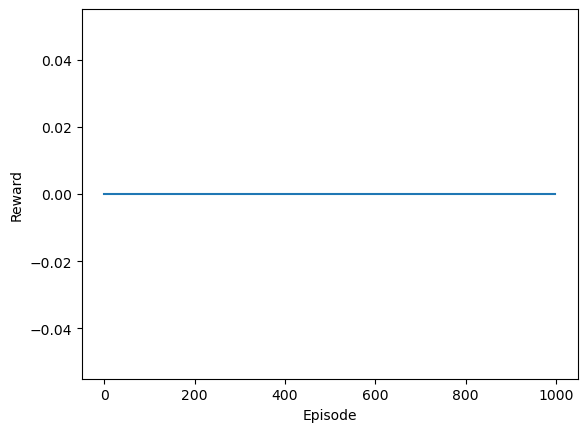

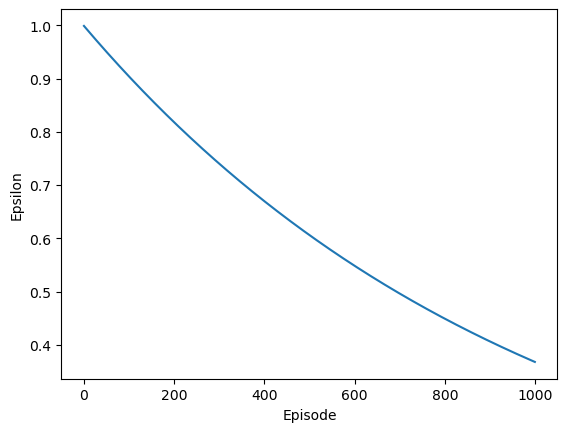

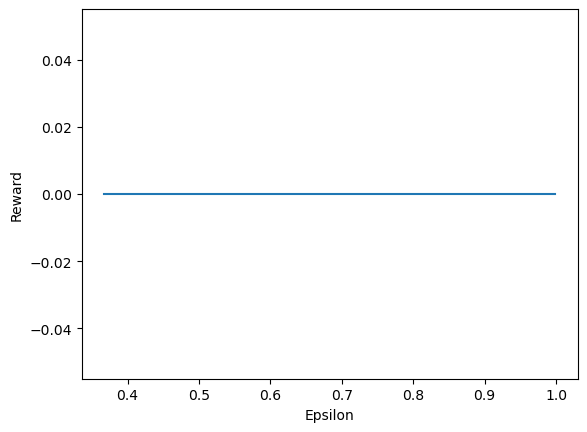

In [10]:
### code based from tutorail 3
# Training the reinforcement learning model

global epsilon
    
# Lists to store rewards and epsilon values for plotting
epsilon_values = []
reward_values = []
    
# Loop through episodes
for episode in tqdm.tqdm(range(total_episodes)):
    state = env.reset()
    reward_total = 0
    
    for step in range(max_steps_per_episode):
        # Exploration vs Exploitation: Choose action based on epsilon-greedy strategy
        if random.random() < epsilon:
            action = env.action_space.sample()
        else:
            # Action selection using the trained neural network model
            action = int(np.round(3/2 * (neural_model.predict(np.array([state])) + 1)))
            
        # Take the chosen action
        next_state, reward, done, info = env.step(action)
        reward_total += reward
            
        # Calculate the goal for training the model
        goal = reward
        if not done:
             goal = reward + discount_factor * np.round(3/2 * (neural_model.predict(np.array([next_state])) + 1))
        else:
            goal = np.round(3/2 * (neural_model.predict(np.array([state])) + 1))  # Game over
            
        # Train the model with the state and goal
        neural_model.fit(np.array([state]), goal, epochs=1, verbose=0)
            
        state = next_state  # Move to the next state
            
        if done:
            break
        
    epsilon = max(minimum_epsilon, epsilon * epsilon_decay_rate)  # Decay epsilon for exploration
    epsilon_values.append(epsilon)
    reward_values.append(reward_total)

display_reward_episode_plot(reward_values)
display_epsilon_episode_plot(epsilon_values)
display_reward_epsilon_plot(reward_values, epsilon_values)


### Q-learning agent that utilizes a Q-table 

#### Trying different approach where this code implements a Q-learning agent that utilizes a Q-table for storing Q-values. The agent employs an epsilon-greedy strategy for exploration, but the epsilon value remains fixed throughout the training process.

In [26]:
class QLearningAgent:
    def __init__(self, env, learning_rate, discount_factor, exploration_rate, num_episodes, max_steps_per_episode, num_test_episodes, render=False, test=False):
        # Initialization of Q-learning agent with environment and hyperparameters
        self.env = env
        self.learning_rate = learning_rate  # Learning rate (alpha)
        self.discount_factor = discount_factor  # Discount factor (gamma)
        self.exploration_rate = exploration_rate  # Exploration rate (epsilon)
        self.num_episodes = num_episodes
        self.num_test_episodes = num_test_episodes
        self.max_steps_per_episode = max_steps_per_episode
        self.render = render
        self.test = test

        # Number of states and actions in the environment
        self.num_states = env.observation_space.n
        self.num_actions = env.action_space.n

        # Results of Q-learning training and testing
        self.results = self.q_learning()

    def epsilon_greedy_action(self, Q_values, num_actions, state, training=False):
        # Epsilon-greedy action selection strategy during training
        if training or np.random.rand() < self.exploration_rate:
            action = np.argmax(Q_values[state, :])
        else:
            action = np.random.randint(0, num_actions)
        return action

    def q_learning(self):
        # Q-learning training process
        Q_values = np.ones((self.num_states, self.num_actions))  # Initialize Q-values
        timestep_rewards = []  # Record rewards at each timestep
        episode_durations = []  # Record duration of each episode

        for episode in tqdm.tqdm(range(self.num_episodes)):
            state = self.env.reset()
            action = self.epsilon_greedy_action(Q_values, self.num_actions, state)
            t = 0  #Initialization of timestep counter
            total_reward = 0
            done = False
            
            #Execute the episode until the maximum number of steps is reached or the episode is done
            while t < self.max_steps_per_episode:
                if self.render:
                    self.env.render()
                t += 1
                # Take the chosen action and observe the next state and reward
                next_state, reward, done, _ = self.env.step(action)
                total_reward += reward
                next_action = np.argmax(Q_values[next_state, :]) #picking the next action using the current Q-values
                
                # Update Q-values based on the observed reward and transitio
                if done:
                    Q_values[state, action] += self.learning_rate * (reward - Q_values[state, action])
                else:
                    Q_values[state, action] += self.learning_rate * (reward + self.discount_factor * Q_values[next_state, next_action] - Q_values[state, action])

                state, action = next_state, next_action #Transition to the next state and action

                if done:
                    episode_durations.append(t)
                    if self.render:
                        print(f"The agent's total reward is: {total_reward}, Time taken for episode: {t} timesteps")
                    timestep_rewards.append(total_reward)
                    break

        if self.render:
            print(f"The Q values:\n{Q_values}\n")

        if self.test:
            self.test_agent(Q_values, self.num_actions)

        return timestep_rewards, episode_durations

    def get_results(self):
        # Return the results of Q-learning 
        return self.results

    def test_agent(self, Q_values, num_actions, delay=1):
        # Testing the trained agent
        for test in range(self.num_test_episodes):
            print(f"Testing #{test}")
            state = self.env.reset()
            done = False
            exploration_rate = 0

            while True:
                time.sleep(delay)
                self.env.render()
                action = self.epsilon_greedy_action(Q_values, exploration_rate, num_actions, state, training=True)
                print(f"For state {state}, implement action {action}")
                state, reward, done, _ = self.env.step(action)

                if done:
                    if reward > 0:
                        print("The agent reached the target")
                    else:
                        print("The agent FAILED")
                    time.sleep(3)
                    break

# Creating an instance of the QLearningAgent class
q_learning_agent = QLearningAgent(env,
                                  learning_rate=0.4,
                                  discount_factor=0.999,
                                  exploration_rate=0.9,
                                  num_episodes=100000,
                                  max_steps_per_episode=2500,
                                  num_test_episodes=2,
                                  render=False,
                                  test=False)

# Obtaining results
timestep_rewards_q, episode_durations_q = q_learning_agent.get_results()


100%|██████████| 100000/100000 [00:43<00:00, 2299.51it/s]


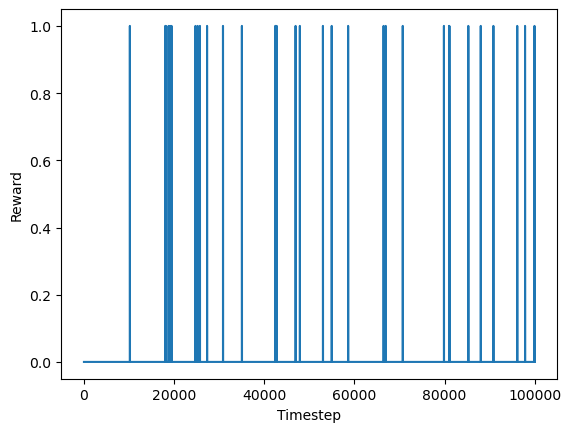

In [27]:
# Plot the reward per timestep
plt.plot(timestep_reward_q)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.show()

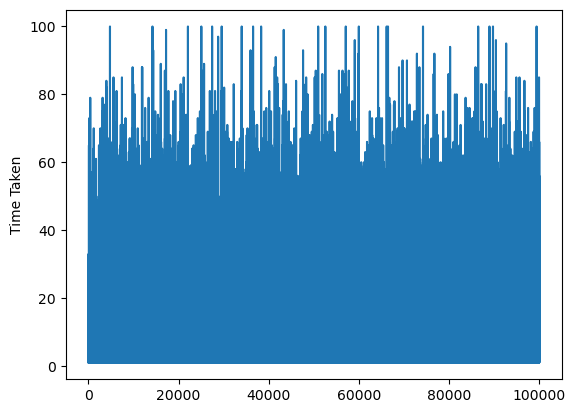

In [30]:
plt.plot(episode_durations_q)
plt.ylabel("Time Taken")
plt.show()

### 1.4) Randomly relying on the exploration of the grid can be a time-consuming process.Implement another agent, using ANY technique of your choice, which is aware of another additional information: The position of the chest at the bottom right corner. The agent should not cheat, i.e., they should not (at least initially) be aware of the layout of the map,i.e., the positions of the holes. Explain all design choices that were made to create this agent

In [11]:
pip install --upgrade pip setuptools

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.



  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/e1/ed2dd0850446b8697ad28d118df885ad04140c64ace06c4bd559f7c8a94f/setuptools-69.0.2-py3-none-any.whl.metadata
  Using cached setuptools-69.0.2-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 2.3 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.1 MB 1.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.1 MB 2.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.1 MB 3.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/2.1 MB 2.8 MB/s eta 0:00:01
   -----

In [12]:
pip install tensorflow-gpu


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_v

In [16]:
#pip install tensorflow-gpu==2.12.0



  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\habib\anaconda3\Lib\site-packages\setuptools\_v

In [2]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))
##

GPU Available: []


In [4]:
random_map = generate_random_map(size=10, p=0.3)
env_2 = gym.make("FrozenLake-v1", desc=random_map, is_slippery=True)
env_2.reset()
env_2.render()

0

In [5]:
epsilon_2 = 0.5
epsilon_2_decay_rate = 0.999
gamma = 0.95
number_of_episodes=100000

In [7]:
model = Sequential()
model.add(InputLayer(batch_input_shape=(1, env_2.observation_space.n)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(env_2.action_space.n, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (1, 20)                   2020      
                                                                 
 dense_5 (Dense)             (1, 20)                   420       
                                                                 
 dense_6 (Dense)             (1, 20)                   420       
                                                                 
 dense_7 (Dense)             (1, 4)                    84        
                                                                 
Total params: 2944 (11.50 KB)
Trainable params: 2944 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
for episode_iter in tqdm.tqdm(range(num_episodes)):
    current_state = env.reset()
    
    #update exploration probability for epsilongreedy policy
    epsilon_2 *= epsilon_2_decay_rate
    done = False
    
    # Execute the episode until completion
    while not done:
        # pick action based on epsilon-greedy policy
        if np.random.random() < epsilon_2:
            selected_action = np.random.randint(0, env.action_space.n)
        else:
            selected_action = np.argmax(
              model.predict(np.identity(env.observation_space.n)[current_state:current_state + 1]))
        
        # Take the selected action and observe the next state and reward
        next_state, reward, done, _ = env.step(selected_action)
        
        #calculating the target value for updating the Q-values
        target_value = reward + gamma * np.max(model.predict(np.identity(env.observation_space.n)[next_state:next_state + 1]))
        
        #theQ-values for the current state
        target_vector = model.predict(np.identity(env.observation_space.n)[current_state:current_state + 1])[0]
        
        target_vector[selected_action] = target_value # update qvalues

        training_history = model.fit(
          np.identity(env.observation_space.n)[current_state:current_state + 1], 
          target_vector.reshape(-1, env.action_space.n), 
          epochs=1, verbose=0) #train model with the updated Q-values
        
        current_state = next_state
    
    clear_output(wait=True)

In [ ]:
model.predict(np.identity(env.observation_space.n))

### 1.5) Evaluate the agent created in 1.4 and discuss your results with respect to the previousquestions

In [ ]:
"""
This loop continues until the reward becomes 1.0, indicating the completion
of a successful episode. The agent takes actions based on the learned policy
(exploitation) and renders the environment for visualization.

- The outer loop continues until the reward reaches 1.0.
- In each episode:
  - The environment is reset to the initial state.
  - The inner loop executes until the episode is complete.
    - The agent selects actions based on the learned policy (exploitation).
    - The environment is rendered for visualization.
    - A short pause is introduced for visualization purposes.
"""

while reward != 1.0:
    current_state = env.reset()
    done = False
    while not done:
        selected_action = np.argmax(model.predict(np.identity(env.observation_space.n)[current_state:current_state + 1]))
        next_state, reward, done, _ = env.step(selected_action)
        clear_output(wait=True)
        env.render()
        time.sleep(1)